In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
comm_sales_k = pd.read_excel(r"C:\Users\hemachandrao.balu\Downloads\Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem1', nrows=10)
comm_sales_k

,No of Commercials (x),Sales Volume (K$) (y)
0,2,50
1,5,57
2,1,41
3,3,54
4,4,54
5,1,38
6,5,63
7,3,48
8,4,59
9,2,46


In [13]:
comm_sales_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   No of Commercials (x)  10 non-null     int64
 1   Sales Volume (K$) (y)  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


1. In a Sound and stereo store in Chicago the manager wants to know is there any relationship between the number of weekend television commercials shown and sales at the store at the following week. The sample data of the store is provided in the spread sheet tab. Use that to solve the below problem

1. Find the covariance between the variables and tell us is there any relationship between them


In [15]:
def covariance(x,y,n):
    return ((x-x.mean()) * (y-y.mean())).sum() / (n-1)
x_k = comm_sales_k['No of Commercials (x)']
y_k = comm_sales_k['Sales Volume (K$) (y)']
n_k = len(comm_sales_k)

print(x_k.mean())
print(y_k.mean())
print(n_k)

3.0
51.0
10


In [16]:
covariance(x_k,y_k,n_k)

11.0

In [17]:
comm_sales_k.cov()

,No of Commercials (x),Sales Volume (K$) (y)
No of Commercials (x),2.222,11.000
Sales Volume (K$) (y),11.000,62.889


2. Is the Sales and number of commercials correlated? If yes - Positive/ Negative

In [23]:
def correlation(x,y,n):
    return covariance(x,y,n) / (x.std() * y.std())


In [24]:
correlation(x_k, y_k, n_k)

0.9304905807411791

In [25]:
comm_sales_k.corr()

,No of Commercials (x),Sales Volume (K$) (y)
No of Commercials (x),1.000,0.930
Sales Volume (K$) (y),0.930,1.000


Text(0, 0.5, 'Sales Volume (in K$)')

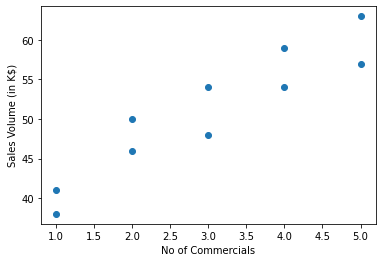

In [22]:
plt.scatter(x_k, y_k)
plt.xlabel('No of Commercials')
plt.ylabel('Sales Volume (in K$)')

2. In the above problem the Manager has been provided the data with the sales amount measured in Kilo $ (1000$). But now the sales team provides a new data in Tab 2 with the amount in $. Does this unit of measurement impact the covariance and correlation calculated in problem1. The data is in Tab2

Calculate the new covariance and correlation and confirm

In [26]:
comm_sales = pd.read_excel("Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem2', nrows=10)

In [28]:
x = comm_sales['No of Commercials (x)']
y = comm_sales['Sales Volume ($) (y)']
n = len(comm_sales)
print(covariance(x_k, y_k, n_k))
print(covariance(x, y, n))

11.0
11000.0


In [29]:
print(correlation(x_k,y_k,n_k))
print(correlation(x,y,n))

0.9304905807411791
0.9304905807411791


3. The sales report about the pharmaceutical company in million $ for the 21 states in US has been provided in the spread sheet

        
       1. Provide the five number summary of the box plot

In [30]:
us_sales = pd.read_excel(r"C:\Users\hemachandrao.balu\Downloads\Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem3')

In [31]:
us_sales

,State,Sales
0,Arizona,8408
1,California,1374
2,Colorado,1872
3,Florida,8879
4,Georgia,2459
5,Kansas,11413
6,Kentucky,608
7,Ohio,14138
8,Maryland,6452
9,Massachusetts,1850


In [32]:
us_sales.describe(include='all')

,State,Sales
count,21,21.000
unique,21,NaN
top,Arizona,NaN
freq,1,NaN
mean,NaN,5170.524
std,NaN,3917.733
min,NaN,608.000
25%,NaN,1872.000
50%,NaN,4019.000
75%,NaN,8305.000


<AxesSubplot:>

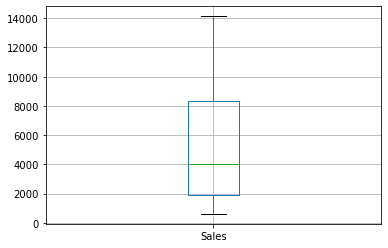

In [33]:
us_sales.boxplot()

2. Compute the lower and upper limits

In [34]:
import math

In [36]:
Q1 = us_sales['Sales'].quantile(0.25)
Q3 = us_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)
Q1, Q3, IQR, L, U

(1872.0, 8305.0, 6433.0, -7777, 17954)

3. Does the data contain any outlier ?
The data has no outliers. All the values in Sales col are bounded between the Lower and Upper Limits (-7777, 17954)

4. Ohio state has the highest sales at $14,138 million. Suppose a data entry error has been made as $ 41,138 million would this been identified as an outlier and corrected

In [37]:
us_sales.loc[us_sales['State']=='Ohio', 'Sales'] = 41138
us_sales.describe(include='all')

,State,Sales
count,21,21.000
unique,21,NaN
top,Arizona,NaN
freq,1,NaN
mean,NaN,6456.238
std,NaN,8618.300
min,NaN,608.000
25%,NaN,1872.000
50%,NaN,4019.000
75%,NaN,8305.000


<AxesSubplot:>

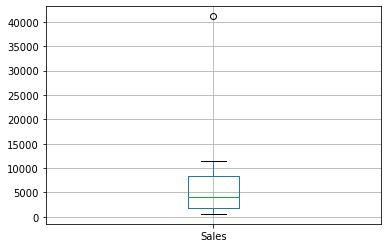

In [39]:
us_sales.boxplot()

In [40]:
Q1 = us_sales['Sales'].quantile(0.25)
Q3 = us_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)
Q1, Q3, IQR, L, U

(1872.0, 8305.0, 6433.0, -7777, 17954)

In [41]:
us_sales[(us_sales['Sales'] < L) | (us_sales['Sales'] > U)]

,State,Sales
7,Ohio,41138


In [42]:
us_sales = us_sales[(us_sales['Sales'] > L) & (us_sales['Sales'] < U)]
us_sales

us_sales.describe(include='all')

,State,Sales
count,20,20.000
unique,20,NaN
top,Arizona,NaN
freq,1,NaN
mean,NaN,4722.150
std,NaN,3422.343
min,NaN,608.000
25%,NaN,1866.500
50%,NaN,3836.000
75%,NaN,7684.750


<AxesSubplot:>

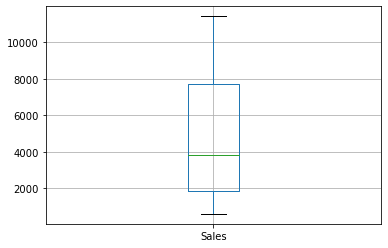

In [43]:
us_sales.boxplot()

In [44]:
Q1 = us_sales['Sales'].quantile(0.25)
Q3 = us_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)
Q1, Q3, IQR, L, U

(1866.5, 7684.75, 5818.25, -6860, 16412)

5. Out of 21 states provided what percentile states are above the Washington

In [45]:
us_sales

,State,Sales
0,Arizona,8408
1,California,1374
2,Colorado,1872
3,Florida,8879
4,Georgia,2459
5,Kansas,11413
6,Kentucky,608
8,Maryland,6452
9,Massachusetts,1850
10,Michigan,2818


In [46]:
us_sales['Percentile'] = us_sales['Sales'].rank(method='max').apply(lambda x: 100.0*(x-1)/(len(us_sales)-1))
us_sales.sort_values(by='Percentile', ascending=False)

C:\Users\hemachandrao.balu\AppData\Local\Temp\ipykernel_10220\667641032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_sales['Percentile'] = us_sales['Sales'].rank(method='max').apply(lambda x: 100.0*(x-1)/(len(us_sales)-1))


,State,Sales,Percentile
5,Kansas,11413,100.000
12,Missouri,10498,94.737
3,Florida,8879,89.474
0,Arizona,8408,84.211
20,West Virginia,8305,78.947
13,New Jersey,7478,73.684
8,Maryland,6452,68.421
19,Washington,5794,63.158
15,Oklahoma,4341,57.895
14,Louisiana,4019,52.632


6. What is the 85th percentile ?

In [47]:
us_sales['Sales'].quantile(0.85)

8478.65

4. In an IPL auction a team wants to buy a foreign player who is an all-rounder to balance their side. The team has the budget to spend on only one player and they are looking for a player who could help them in their batting department. The franchise now has the data with the runs scored by player A and player B in their last 20 matches and are confused on their selection

Can you help them with your analysis? You know what needs to be don

In [48]:
player_df = pd.read_excel("Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem4')
player_df

,Player A,Player B
0,25,0
1,40,25
2,38,22
3,48,38
4,51,25
5,35,45
6,100,51
7,25,60
8,15,62
9,20,93


In [49]:
def coeff_variation(x):
    return x.std() / x.mean() * 100

In [50]:
print(coeff_variation(player_df['Player A']))
print(coeff_variation(player_df['Player B']))
if coeff_variation(player_df['Player A']) > coeff_variation(player_df['Player B']):
    print("Player B")
else:
    print("Player A")

57.73378662579239
72.27468785704656
Player A


In [51]:
samples_analysis = []
for _ in range(10):
    sample={}
    sample_df = player_df.sample(n=7)
    sample['MeanA']=sample_df['Player A'].mean()
    sample['MeanB']=sample_df['Player B'].mean()
#     print(sample)
    samples_analysis.append(sample)
samples_analysis_df = pd.DataFrame(samples_analysis)
samples_analysis_df

,MeanA,MeanB
0,35.571,34.143
1,31.286,43.857
2,29.857,30.429
3,41.429,44.143
4,32.714,39.714
5,29.286,27.571
6,31.286,26.286
7,29.429,43.429
8,43.143,34.143
9,40.714,33.857


In [52]:
print("Population Mean")
print("Player A : ", player_df['Player A'].mean())
print("Player B : ", player_df['Player B'].mean())
print("Sample Mean")
print("Player A : ", samples_analysis_df['MeanA'].mean())
print("Player B : ", samples_analysis_df['MeanB'].mean())
print("\nPopulation Std")
print("Player A : ", player_df['Player A'].std())
print("Player B : ", player_df['Player B'].std())
print("Sample Std")
print("Player A : ", samples_analysis_df['MeanA'].std())
print("Player B : ", samples_analysis_df['MeanB'].std())

Population Mean
Player A :  35.0
Player B :  35.0
Sample Mean
Player A :  34.471428571428575
Player B :  35.75714285714286

Population Std
Player A :  20.206825319027338
Player B :  25.296140749966295
Sample Std
Player A :  5.382869443587874
Player B :  6.702979335548418


In [53]:
a=[15,5,20,45,85,65,30,10,20]
sum(a)/len(a)

32.77777777777778